In [5]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0  #normalize [0,1]
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


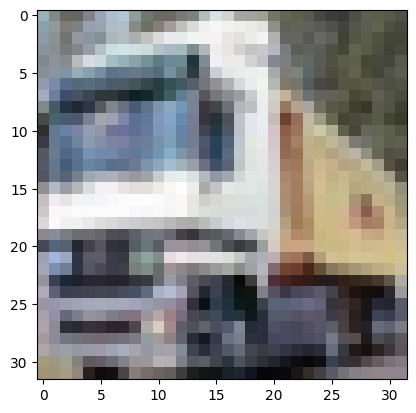

In [13]:
plt.imshow(x_train[1])
plt.show()

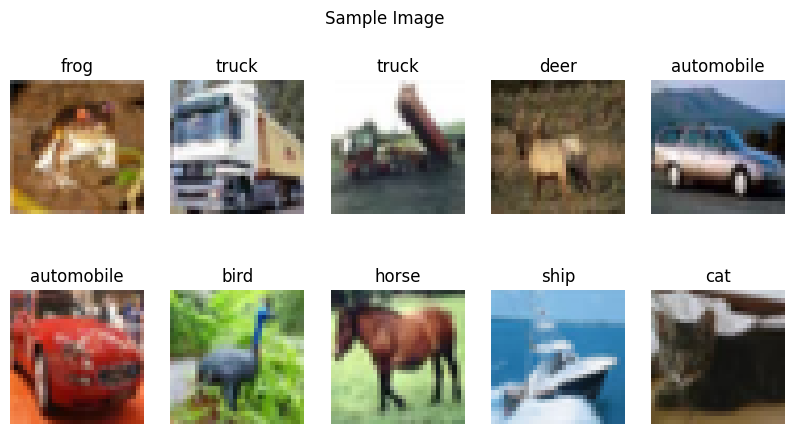

In [15]:
import numpy as np

class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Image")
plt.show()

In [17]:
# Model build

inputs = Input(shape=(32, 32, 3))  #input layers 32x32 rgb image.
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)  #Feature extract 3x3 filters.
x = layers.MaxPool2D((2, 2))(x) # Down sampling (reduce spatial size)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model1 = tf.keras.Model(inputs, outputs)
model1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model1.fit(x_train, y_train, batch_size=16, epochs=2, validation_split=0.1)

Epoch 1/2
  30/2813 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6323 - loss: 1.0559

2025-08-12 14:33:02.534185: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


2805/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6622 - loss: 0.9692

2025-08-12 14:33:18.365512: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6664 - loss: 0.9598 - val_accuracy: 0.6698 - val_loss: 0.9733
Epoch 2/2
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.6981 - loss: 0.8687 - val_accuracy: 0.6994 - val_loss: 0.8864


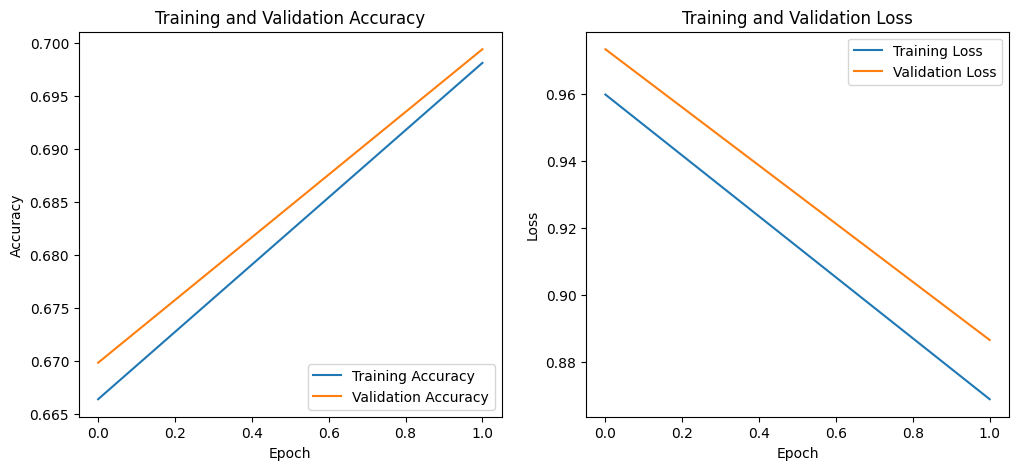

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])